In [1]:
import warnings
from synthcity.plugins import Plugins
from synthcity.utils.datasets.time_series.google_stocks import GoogleStocksDataloader
from synthcity.plugins.core.dataloader import TimeSeriesDataLoader

warnings.filterwarnings("ignore")


eval_plugin = "ctimegan"

[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


In [2]:
# Load data
static_data, temporal_data, outcome = GoogleStocksDataloader(seq_len=4).load()
loader = TimeSeriesDataLoader(
    temporal_data=temporal_data, static_data=static_data, outcome=outcome,
)

loader.dataframe()

,temporal_open_t0,temporal_open_t1,temporal_open_t2,temporal_open_t3,temporal_high_t0,temporal_high_t1,temporal_high_t2,temporal_high_t3,temporal_low_t0,temporal_low_t1,...,temporal_close_t3,temporal_volume_t0,temporal_volume_t1,temporal_volume_t2,temporal_volume_t3,temporal_adj_close_t0,temporal_adj_close_t1,temporal_adj_close_t2,temporal_adj_close_t3,out_open_next
0,0.207850,0.240129,0.267568,0.250773,0.202950,0.232621,0.259325,0.223372,0.238566,0.284188,...,0.244052,0.217548,0.302981,0.267980,0.159714,0.225015,0.252231,0.238288,0.244052,0.147661
1,0.484852,0.528302,0.572671,0.569545,0.488414,0.542774,0.582429,0.563909,0.508925,0.579980,...,0.583654,0.073394,0.072471,0.053134,0.071298,0.508031,0.557997,0.550300,0.583654,0.097320
2,0.363622,0.284666,0.250045,0.328755,0.323760,0.259257,0.309270,0.326930,0.276546,0.298846,...,0.336429,0.207005,0.094674,0.148285,0.101501,0.272279,0.243822,0.329019,0.336429,0.149420
3,0.129095,0.215211,0.223300,0.200914,0.183909,0.207727,0.184407,0.207727,0.171326,0.247252,...,0.228956,0.373930,0.277050,0.204047,0.334132,0.201388,0.210632,0.183920,0.228956,0.110283
4,0.331444,0.260947,0.208208,0.212981,0.292675,0.256042,0.205078,0.172838,0.304058,0.247865,...,0.118090,0.200020,0.213233,0.127591,0.315308,0.256316,0.198489,0.187005,0.118090,0.105667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.601197,0.656926,0.671996,0.681576,0.669142,0.658093,0.677519,0.656814,0.646130,0.681170,...,0.608171,0.058873,0.071750,0.064520,0.014319,0.634871,0.644917,0.653020,0.608171,0.636042
89,0.272621,0.368675,0.309595,0.347107,0.334220,0.341137,0.314138,0.354846,0.308327,0.347454,...,0.337494,0.153675,0.106916,0.037867,0.107991,0.352140,0.288473,0.330479,0.337494,0.665050
90,0.356082,0.370972,0.338457,0.290212,0.341510,0.327971,0.300769,0.244779,0.402001,0.345149,...,0.259170,0.058139,0.081314,0.143689,0.055860,0.351811,0.322563,0.275727,0.259170,0.834838
91,0.188567,0.272621,0.368675,0.309595,0.234726,0.334220,0.341137,0.314138,0.232991,0.308327,...,0.330479,0.099307,0.153675,0.106916,0.037867,0.255624,0.352140,0.288473,0.330479,0.870378


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(loader)

In [4]:
# Generate new samples

syn_model.generate(count=10).dataframe()

,temporal_open_t0,temporal_open_t1,temporal_open_t2,temporal_open_t3,temporal_high_t0,temporal_high_t1,temporal_high_t2,temporal_high_t3,temporal_low_t0,temporal_low_t1,...,temporal_close_t3,temporal_volume_t0,temporal_volume_t1,temporal_volume_t2,temporal_volume_t3,temporal_adj_close_t0,temporal_adj_close_t1,temporal_adj_close_t2,temporal_adj_close_t3,out_open_next
0,0.309837,0.294437,0.389061,0.235810,0.292001,0.333931,0.236403,0.231249,0.440912,0.267770,...,0.355228,0.041415,0.149897,0.135487,0.107854,0.341622,0.390005,0.336119,0.269807,0.635909
1,0.152423,0.196386,0.205197,0.184689,0.197816,0.143797,0.175690,0.198175,0.216758,0.265121,...,0.200165,0.250983,0.125533,0.122155,0.112749,0.221483,0.186987,0.139967,0.184570,0.292823
2,0.267516,0.332487,0.394971,0.431803,0.310555,0.412578,0.430142,0.318068,0.342331,0.397937,...,0.445718,0.109447,0.219299,0.173646,0.281440,0.362180,0.295735,0.383036,0.590889,0.692452
3,0.247089,0.312727,0.242852,0.254273,0.292125,0.247937,0.230010,0.192054,0.205238,0.267242,...,0.239573,0.270264,0.271038,0.172804,0.441393,0.191364,0.443078,0.195438,0.178895,0.291248
4,0.189661,0.194991,0.346359,0.312568,0.189120,0.267455,0.274390,0.202864,0.221462,0.178088,...,0.191083,0.195634,0.295622,0.237897,0.292220,0.243471,0.306065,0.261736,0.139908,0.294016
5,0.224888,0.361327,0.389166,0.431420,0.270285,0.365121,0.407700,0.324590,0.322251,0.366097,...,0.451722,0.085802,0.091397,0.196622,0.080487,0.396083,0.277922,0.378668,0.286709,0.220806
6,0.267511,0.332483,0.394985,0.431824,0.310519,0.412573,0.430182,0.318055,0.342345,0.397975,...,0.445747,0.109428,0.219223,0.173675,0.281477,0.362152,0.295727,0.383079,0.590878,0.692406
7,0.182850,0.227330,0.340581,0.322610,0.189049,0.298072,0.298380,0.307981,0.278417,0.313088,...,0.413550,0.088540,0.127728,0.145300,0.072682,0.145110,0.238105,0.290029,0.537407,0.293473
8,0.661737,0.661883,0.644850,0.676467,0.663570,0.644268,0.664397,0.678151,0.662872,0.710177,...,0.692381,0.060940,0.070420,0.050422,0.019134,0.645331,0.684054,0.672655,0.640652,0.214065
9,0.309105,0.293507,0.389271,0.235469,0.290905,0.332357,0.235145,0.233333,0.442064,0.267987,...,0.356340,0.042388,0.150580,0.134897,0.107773,0.341914,0.392179,0.338548,0.275362,0.634117


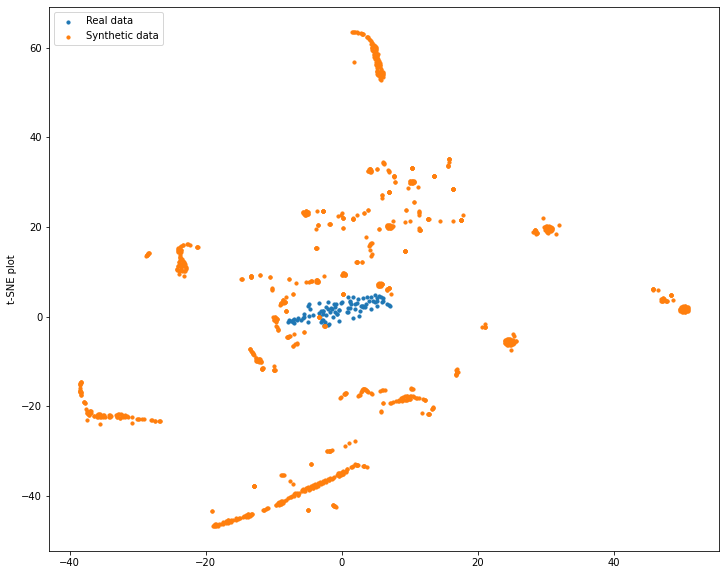

In [5]:
# plot

import matplotlib.pyplot as plt

syn_model.plot(plt, loader, count=1000, plots=["tsne"])

plt.show()

In [ ]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate([eval_plugin], loader, task_type="time_series", repeats=2,)

[2022-06-11T14:56:02.966963+0100][898015][CRITICAL] [ctimegan][take 0] failed: Expecting conditional with the same length as the dataset


In [ ]:
Benchmarks.print(score)